# Ecommerce Purchases Exercise

In this Exercise you will be given some Fake Data about some purchases done through Amazon! Just go ahead and follow the directions and try your best to answer the questions and complete the tasks. Feel free to reference the solutions. Most of the tasks can be solved in different ways. For the most part, the questions get progressively harder.

Please excuse anything that doesn't make "Real-World" sense in the dataframe, all the data is fake and made-up.

Also note that all of these questions can be answered with one line of code.
____
** Import pandas and read in the Ecommerce Purchases csv file and set it to a DataFrame called ecom. **

In [23]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [24]:
sal = pd.read_csv('./EcommercePurchases.csv')

**Check the head of the DataFrame.**

In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Address             10000 non-null object
Lot                 10000 non-null object
AM or PM            10000 non-null object
Browser Info        10000 non-null object
Company             10000 non-null object
Credit Card         10000 non-null int64
CC Exp Date         10000 non-null object
CC Security Code    10000 non-null int64
CC Provider         10000 non-null object
Email               10000 non-null object
Job                 10000 non-null object
IP Address          10000 non-null object
Language            10000 non-null object
Purchase Price      10000 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB



** How many rows and columns are there? **

In [33]:
sal.columns.nunique() # đếm số cột
sal['Address'].count() #đếm số dòng


10000

** What is the average Purchase Price? **

In [6]:
sal['Purchase Price'].mean()

50.34730200000025

** What were the highest and lowest purchase prices? **

In [14]:
max_paid = sal['Purchase Price'].max()
selectrow = sal['Purchase Price'] == max_paid
sal[selectrow]

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
2092,"63773 Shelton Greens\nAshleyton, MA 00493",56 lu,AM,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Pitts Group,4292741269160,06/18,824,Maestro,heatherwoodard@lloyd.com,"Surveyor, hydrographic",172.197.216.229,el,99.99
7807,"PSC 6177, Box 1004\nAPO AA 57143-1269",64 Nf,AM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_5_4)...,"Porter, Johnson and Pratt",30109394842259,11/25,918,VISA 16 digit,kelli72@gmail.com,"Surveyor, insurance",89.51.92.242,de,99.99


In [16]:
min_paid = sal['Purchase Price'].min()
select_row = sal['Purchase Price'] == min_paid
sal[select_row]

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
2876,"332 Jones Parkways\nEast Katherineville, GA 64230",39 GT,AM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_6_9...,"Lyons, Diaz and Clark",4204500444841766,01/18,38,VISA 16 digit,jennifer11@baker.com,Biomedical scientist,223.47.177.174,it,0.0
5487,"465 Mallory Ways\nNorth Rebecca, RI 82734-1160",93 OH,PM,Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gec...,Flynn and Sons,30469912089738,09/23,236,Discover,mjohnson@austin.org,Stage manager,43.99.56.59,zh,0.0


** How many people have English 'en' as their Language of choice on the website? **

In [38]:
select_row = sal['Language'] == 'en'
sal[select_row]['Language'].count()

1098

** How many people have the job title of "Lawyer" ? **


In [39]:
def check_lawyer(Job):
    if 'lawyer' in Job.lower():
        return True
    return False
sal['Job'].apply(check_lawyer)

True

In [44]:
sal['Job'].apply(check_lawyer)
select_row = sal['Job'].apply(check_lawyer) == True
sal[select_row]['Job'].count()

30

** How many people made the purchase during the AM and how many people made the purchase during PM ? **

**(Hint: Check out [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) ) **

In [55]:
select_row = sal['AM or PM'] == 'AM'
#sal[select_row].value_counts() == 1
sal[select_row]['AM or PM'].count()



4932

** What are the 5 most common Job Titles? **

In [57]:
sal['Job'].value_counts().head(5)

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Purchasing manager                   27
Research officer, political party    27
Name: Job, dtype: int64

** Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? **

In [102]:
select_row = sal['Lot'] == '90 WT'
sal[select_row]['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

** What is the email of the person with the following Credit Card Number: 4926535242672853 **

In [7]:
select_row = sal['Credit Card'] == '4204500444841760'
sal[select_row]['Email']

E:\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

** How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?**

In [77]:
select_row = sal['CC Provider'] == 'American Express'
sum(sal[select_row]['Purchase Price'] > 95)

39

** Hard: How many people have a credit card that expires in 2025? **

In [151]:
sal = pd.read_csv('./EcommercePurchases.csv')
a = []
sal['CC Exp Date'] = sal['CC Exp Date'].str.split('/',n=1,expand=False)
for i in range(0,10000):
    a.append(sal['CC Exp Date'][i][1])
sal['Year of CC Exp Date'] = a
#sal['Year of CC Exp Date'].value_counts().head(5)
select_row = sal['Year of CC Exp Date'] == '25'
sal[select_row]['Year of CC Exp Date'].count()

1033

** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **

In [25]:
sal = pd.read_csv('./EcommercePurchases.csv')
a = []
sal['Email'] = sal['Email'].str.split('@',n=1,expand=False)
for i in range(0,10000):
    a.append(sal['Email'][i][1])
sal['End of Email'] = a
sal['End of Email'].value_counts().head(5)


hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: End of Email, dtype: int64

### Data Visualization

** Implement a bar plot for top 5 most popular email providers/hosts **

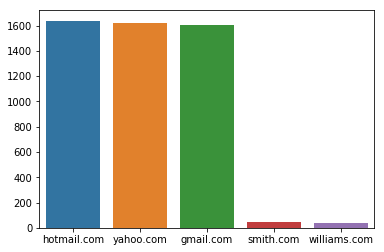

In [26]:
a = ['hotmail.com', 'yahoo.com', 'gmail.com', 'smith.com', 'williams.com']
b = sal['End of Email'].value_counts().head(5).unique()
sns.barplot(x=a, y=b)
# cần câu lệnh để truy xuất ra dữ liệu cần dùng là tên các host thành tập hợp

** Plot distribution of Purchase Price **

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


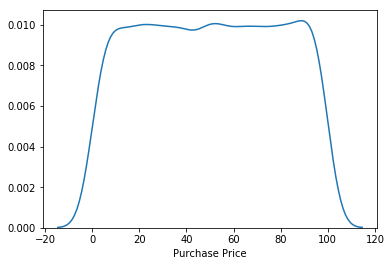

In [28]:
sns.distplot(sal['Purchase Price'], hist=False)
# biểu đồ bị sai vì min của Purchase Price = 0 như bài tập phía trên và đã kiểm tra ở file csv

** Implement countplot on Language **

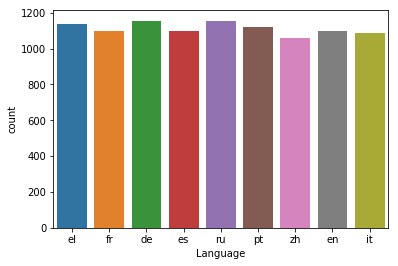

In [29]:
sns.countplot(x='Language', data=sal)

In [ ]:
Feel free to plot more graphs to dive deeper into the dataset.

# Great Job!